In [117]:
%matplotlib notebook


In [118]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from scipy import stats
from scipy.stats import linregress
%matplotlib inline

In [119]:
# Reference the file where the CSV is located
 
nyc_airbnb_data = "Resources/AB_NYC_2019.csv"

# Import data into Pandas DataFrame

nyc_airbnb_df = pd.read_csv(nyc_airbnb_data)
nyc_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [120]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "host_id", "neighbourhood_group", "neighbourhood", "latitude",
#"longitude", "room_type", "price", "minimum_nights", "number_of_reviews", 
#"calculated_host_listings_count", "availability_365"

reduced_nyc_airbnb_df = nyc_airbnb_df[["host_id", "neighbourhood_group", "neighbourhood", "latitude",
"longitude", "room_type", "price", "minimum_nights", "number_of_reviews", 
"calculated_host_listings_count", "availability_365"]]

reduced_nyc_airbnb_df.head()
                        


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [121]:
# Rename neighbourhood_group in reduced_nyc_airbnb_df as borough
reduced_nyc_airbnb_df = reduced_nyc_airbnb_df.rename(columns={"host_id": "Host ID", "neighbourhood_group": "Borough", 
                    "neighbourhood": "Neighbourhood", "latitude": "Latitude","longitude": "Longitude", "room_type": "Room Type", "price": "Price", "minimum_nights": "Minimum Nights",
                    "number_of_reviews": "Total Reviews", "calculated_host_listings_count": "Total Host Listings", 
                    "availability_365": "Yearly Availability"})
reduced_nyc_airbnb_df.head()

,Host ID,Borough,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Total Reviews,Total Host Listings,Yearly Availability
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [122]:
# Calculate total number of boroughs
total_boroughs = len(reduced_nyc_airbnb_df['Borough'].value_counts())
total_boroughs

5

In [123]:
avg_airbnb_price = reduced_nyc_airbnb_df["Price"].mean()
avg_airbnb_price

152.7206871868289

In [124]:
avg_borough_price = reduced_nyc_airbnb_df.groupby(['Borough'])['Price'].mean().reset_index()
avg_borough_price

,Borough,Price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [125]:
borough_listings_total = reduced_nyc_airbnb_df.groupby(['Borough'])['Total Host Listings'].count().reset_index()
borough_listings_total

,Borough,Total Host Listings
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


In [126]:
# Plot sample means with error bars
tick_labels = ["Borough", "Total Host Listing"]

means = [borough_listings_total.mean().values[0]]
x_axis = np.arange(0, len(means))
sem = [borough_listings_total.sem().values[0]]

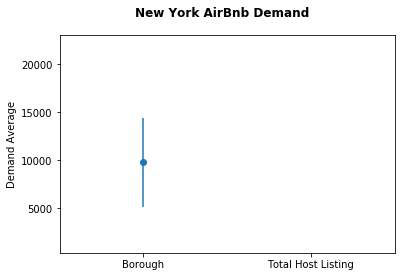

In [127]:
# Plot mean height of players
fig, ax = plt.subplots()

fig.suptitle("New York AirBnb Demand",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(350, 23000)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Demand Average")

plt.show()

In [128]:
# Create a group based on the values in the 'borough' column
avg_borough_price = reduced_nyc_airbnb_df.groupby('Borough')

# Count how many times each maker appears in our group
total_boroughs = borough_listings_total['Borough'].count()

total_boroughs

5

Borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

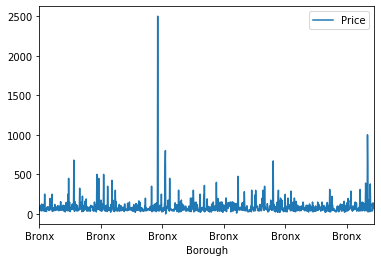

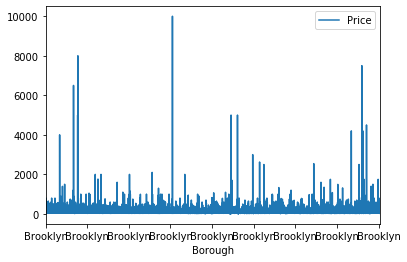

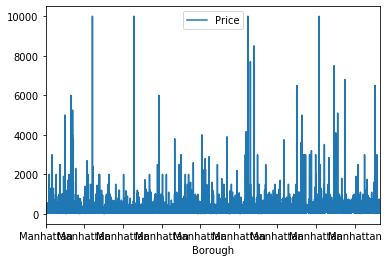

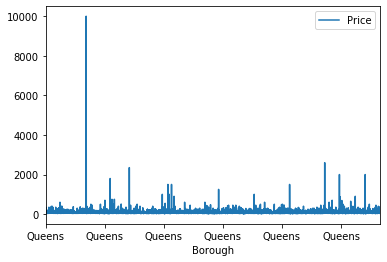

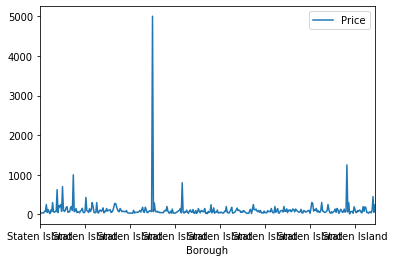

In [77]:
avg_borough_price.plot(x='Borough', y="Price")


In [80]:
# Set data
#x_axis = np.arange(0, 10, 1)
#vg_borough_price = [87.49, 124.38, 196.87, 99.51,114.81]

In [83]:
# Set line
#(slope, intercept, _, _, _) = linregress(x_axis, avg_borough_price)
#fit = slope * x_axis + intercept

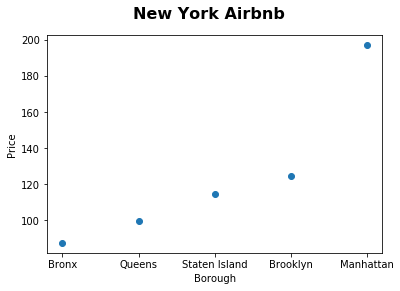

In [114]:
# Plot data

avg_borough_price_sorted = avg_borough_price.sort_values("Price")

fig, ax = plt.subplots()

fig.suptitle("New York Airbnb", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Borough")
ax.set_ylabel("Price")

ax.plot(avg_borough_price_sorted["Borough"], avg_borough_price_sorted["Price"], linewidth=0, marker='o')

plt.show()

In [134]:
borough_listings_total.head()

,Borough,Total Host Listings
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


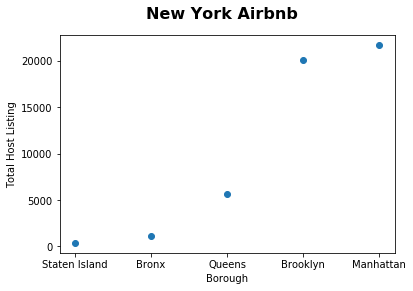

In [136]:
# Plot data

borough_listings_total_sorted = borough_listings_total.sort_values("Total Host Listings")

fig, ax = plt.subplots()

fig.suptitle("New York Airbnb", fontsize=16, fontweight="bold")

ax.set_xlabel("Borough")
ax.set_ylabel("Total Host Listing")

ax.plot(borough_listings_total_sorted["Borough"],borough_listings_total_sorted["Total Host Listings"], linewidth=0, marker='o')

plt.show()